In [1]:
import sys
import seaborn as sns
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import admin_functions as adfn
import plot as pltfn
import scipy
from scipy import stats 
import IS as isfn
import network_mod as netfn
import matplotlib
import powerlaw
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

sns.reset_orig()
#plt.style.use('dark_background')
%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 

sys.version

'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

# Load Empirical data

In [ ]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_av.npy*'))

import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))



for i in range(len(bln_distlist)):
    sns.reset_orig()
    avdistcut = np.load(blnlist[i])[0]
    powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.5, c = 'k')
    avdistcut = np.load(p20list[i])[0]
    powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.5, c = 'red')
    
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i][np.where(bln_distlist[i] < 20000)])
    p20_vec = np.append(p20_vec, p20_distlist[i][np.where(p20_distlist[i] < 20000)])

avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =5 , markersize = 1, alpha = 1)
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =5 , markersize = 1, alpha = 1)

axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

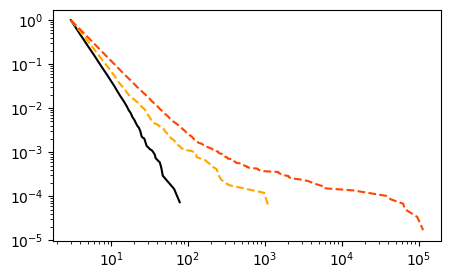

In [2]:
# Choose path and create lists of coord and trace files

# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_randbase*av.npy*'))
prelist = sorted(glob.glob('*PTZ20*_preictal*av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_ictal*av.npy*'))

choose = 0
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
pre_distlist = [np.load(prelist[i])[choose] for i in range(len(prelist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec = []
pre_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i])
    pre_vec = np.append(pre_vec, pre_distlist[i])
    p20_vec = np.append(p20_vec, p20_distlist[i])
    
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (5,3))
sns.reset_orig()
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')
sns.reset_orig()
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered')

plt.show()

# Build network
* unconnected nodes from real fish structure
* k-means on all fish warped to same space: k = mean number of cells
* n cells - distance between cells in space

In [ ]:
#Plot all registered cells
fig,axarr = plt.subplots(figsize = (10,10))
comb_coords = np.load(reglist[0])
for i in range(len(reglist)-1):
    comb_coords = np.row_stack((comb_coords,np.load(reglist[i+1])))

spatial_conversion = [.5, .5, 15]
space_coord = np.multiply(comb_coords, spatial_conversion)
axarr.scatter(space_coord[:,0], space_coord[:,1], s = 4, color = 'black' , alpha = 0.03)
plt.show()
#How many cell clusters - mean of all cells used in av calculation
sumd = 0
for i in range(len(coordlist)):
    sumd = sumd + np.load(coordlist[i]).shape[0]
n_clust = np.int(sumd/len(coordlist))
print(str(n_clust))

In [ ]:
#Remove unwanted coords for plotting
x,y = 140, 240 
coordvec = []
for i in range(5):
    x  = x+10
    y = y-10
    xcoord = np.where(space_coord[:,0] > x)[0]
    ycoord = np.where((space_coord[:,1] > y))[0]
    coordvec = np.append(coordvec, np.intersect1d(xcoord,ycoord))
    
remaining = np.where(space_coord[:,1]< 5)
coordvec = np.append(coordvec, remaining)
coordvec = np.unique(coordvec.astype(int))

new_space_coord = np.zeros((space_coord.shape[0] - coordvec.shape[0], 3))
count=0
for i in range(space_coord.shape[0]):
    if i in coordvec:
        continue
    else:
        new_space_coord[count] = space_coord[i]
        count+=1


In [ ]:
#PLot outlier removal
fig,axarr = plt.subplots(figsize = (10,10))
axarr.scatter(space_coord[:,0], space_coord[:,1], s = 4, color = 'grey' , alpha = 0.1)
axarr.scatter(space_coord[:,0][coordvec], space_coord[:,1][coordvec], s = 4, color = 'red' , alpha = 0.1)
plt.show()

fig,axarr = plt.subplots(figsize = (10,10))
axarr.scatter(new_space_coord[:,0], new_space_coord[:,1], s = 4, color = 'grey' , alpha = 0.1)
plt.show()

sumd = 0
for i in range(len(coordlist)):
    sumd = sumd + np.load(coordlist[i]).shape[0]
n_clust = np.int(sumd/len(coordlist))
print(str(n_clust))

In [ ]:
#Kmeans clustering
from sklearn.cluster import KMeans
kmeans   = KMeans(n_clusters=n_clust, random_state=0).fit(new_space_coord)  #perform k means on all cells
klab =  kmeans.labels_
space_coord_labels = np.column_stack((new_space_coord, klab))
np.save(savepath + 'klabels-spaced-coords.npy', space_coord_labels)

In [ ]:
#Average cells by labels to make new cluster
coords = np.load(net[0])
unq = np.unique(coords[:,3]).astype(int)
node_coord = np.zeros((unq.shape[0], 3))
for i in unq:
    data = coords[np.where(coords[:,3] == unq[i])][:,:3]
    node_coord[i] = [sum(x)/len(x) for x in zip(*data)]
np.save(savepath + 'knodes-coords.npy', node_coord)

In [ ]:
fig,axarr = plt.subplots(figsize = (10,10))
coords = np.load(net[0])
axarr.scatter(coords[:,0], coords[:,1], s = 4, color = 'grey' , alpha = 0.05)
axarr.scatter(node_coord[:,0], node_coord[:,1], s = 4, color = 'red' , alpha = 0.3)
plt.show()

# Connect network

## Network types

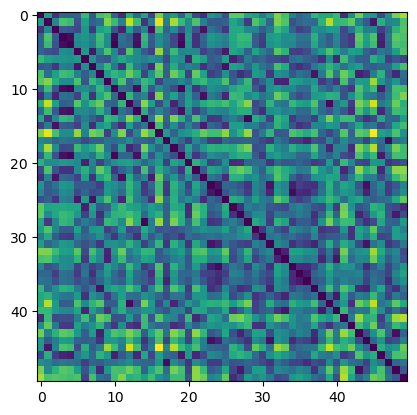

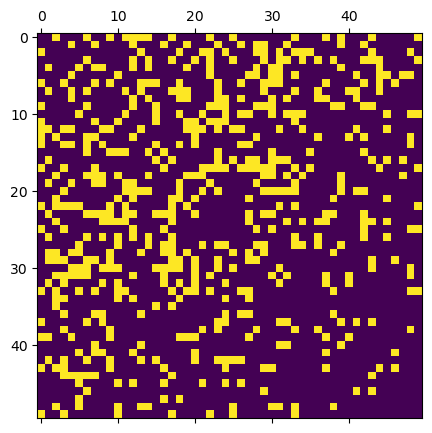

In [5]:
from sklearn.metrics.pairwise import euclidean_distances

#Watts Strogatz - small world network
Nnodes    = 50
cell_locs = np.random.rand(Nnodes, 2)
dist = euclidean_distances(cell_locs)
p = 0.9
k = 10
plt.imshow(dist)
plt.show()

ws = netfn.ws_netsim(dist).net_generate(k, p, 'undirected').A
fig, axarr = plt.subplots(figsize = (5,5))                   
axarr.matshow(ws)
plt.show()



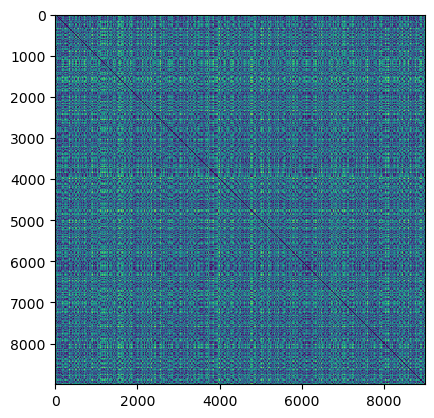

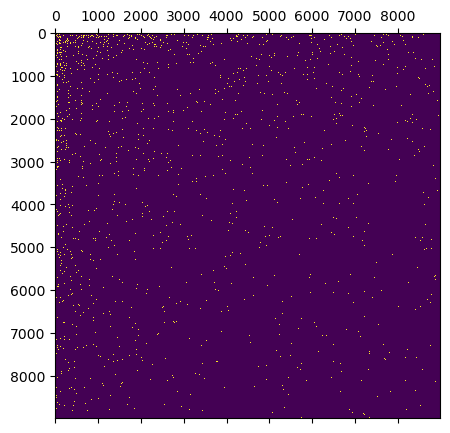

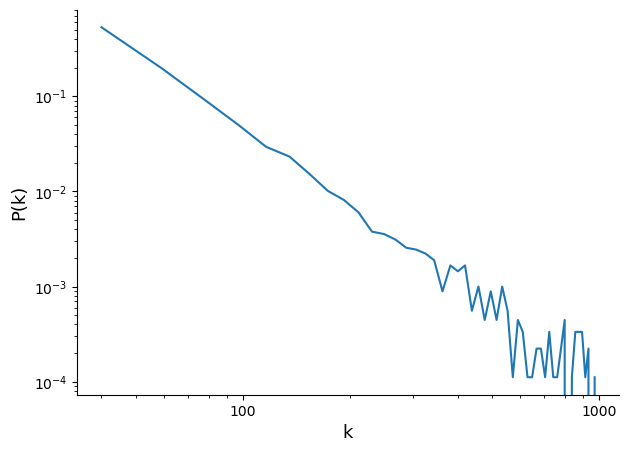

In [44]:
#Barabasi albert - scale free
Nnodes    = nodes.shape[0]
cell_locs = np.random.rand(Nnodes, 2)
dist = euclidean_distances(cell_locs)
k = 40
plt.imshow(dist)
plt.show()

ba = netfn.ba_netsim(dist).net_generate(k, 'directed').A
fig, axarr = plt.subplots(figsize = (5,5))                   
axarr.matshow(ba)
plt.show()

#Degree distribution
import matplotlib 
fig, axarr = plt.subplots(figsize = (7,5))
avdistcut = np.sum(ba, axis = 1)
hist = np.histogram(avdistcut, bins = 50)
xaxis = hist[1]
yaxis = hist[0]/np.sum(hist[0])
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('P(k)', size = '13')
axarr.set_xlabel('k', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig('ba_degree.svg', transparent = True)
plt.show()

# Select parameters
* k = edge density, number of nearest neighbours to connect to
* s = edge weight (probability of firing), scaled for distance
* c = clustering coefficient


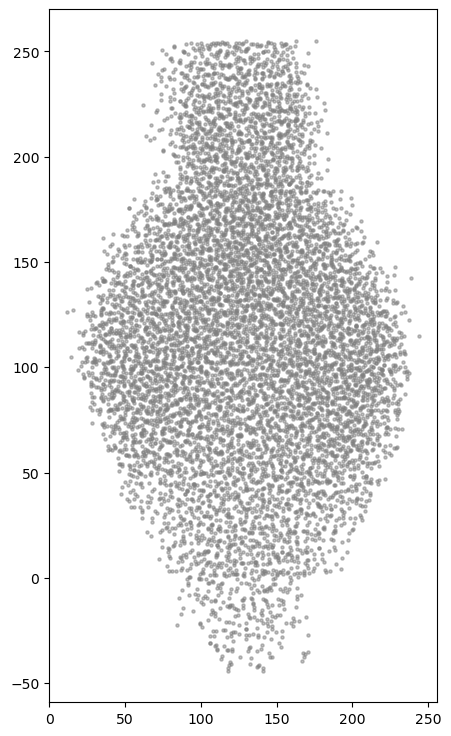

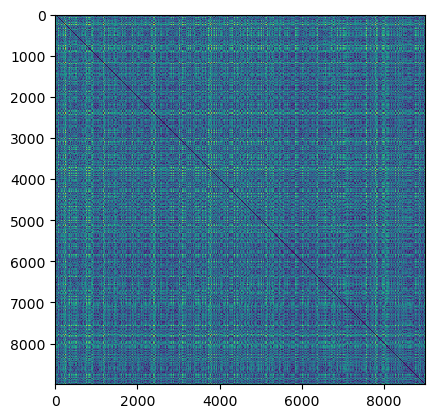

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     

# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)

node = sorted(glob.glob('knodes*'))
fig,axarr = plt.subplots(figsize = (5,9))
nodes = np.load(node[0])
net_nnb = np.load(sorted(glob.glob('*net_model_nnb*'))[0])
axarr.scatter(nodes[:,1], nodes[:,0], s = 5, color = 'grey' , alpha = 0.5)
plt.savefig('k_means_brain.png', transparent = True)

plt.show()

dist = euclidean_distances(nodes)
plt.imshow(dist)
plt.show()

In [ ]:
nodes_cv = np.zeros((nodes.shape[0], 4))
nodes_cv[:,0] = np.arange(nodes.shape[0]) 
nodes_cv[:,1] = np.arange(nodes.shape[0]) 
nodes_cv[:,2:] = nodes[:,:2]

prac_r = 0
curr = netfn.ba_netsim(dist).adjmat_generate(10, s, prac_r, divisor, soften, 'directed')
A = curr.A
W = curr.adj_mat
rows, cols = np.nonzero(A)
w = W[rows, cols]

np.savetxt("r0_k10_edges.csv", edges_cv, delimiter=",", fmt='%f')
np.savetxt("nodes.csv", nodes_cv, delimiter=",", fmt='%f')


In [ ]:
#Single parameter for scaling and relaxing
# Simple sigmoid function to 'soften' the exponential
#-------------------------------------------------------------------------------
def sig(x):
  return 1 / (1+np.exp(-x))

# Conversion from distance to edge weights, scaled (itself exponentially) by s
#-------------------------------------------------------------------------------
def dist2edge(distance, divisor, s):
  edgeweights = np.exp(s/5)*sig(np.exp(-soften/np.exp(s)*distance))/divisor
  return edgeweights

In [ ]:
#Two parameters - one for scaling (s) + one for relaxing (r)
# Conversion from distance to edge weights, scaled (itself exponentially) by s
#s = 1.2, soften = 0.1, divisor = 10
#-------------------------------------------------------------------------------
def dist2edge(distance, divisor, soften, s, r):
    edgeweights = (s + np.exp(-soften/np.exp(r)*distance))/divisor
    return edgeweights


#S parameters
Nsteps  = 30
divisor = 10
soften = 0.1
r_vals   = np.array(np.linspace(0, 7, Nsteps)).tolist()
s = 1.2


#Plot each s value
fig, ax = plt.subplots(1, figsize=(6,6))
colors  = cm.Spectral_r(np.linspace(0,1,Nsteps))
distance = np.linspace(0, np.max(dist), 300)

for r in range(len(r_vals)):
    sumto = np.sum(dist2edge(distance, divisor, soften, s,  r_vals[0]))
    curr_sum = np.sum(dist2edge(distance, divisor, soften, s, r_vals[r]))
    factor = sumto/curr_sum
    curr_dist = dist2edge(distance, divisor, soften, s, r_vals[r]) * factor
    ax.plot(distance, curr_dist,  c=colors[r], linewidth = 2)
#ax.set_xscale('log')
#ax.set_yscale('log')
#plt.savefig('r_scaling.svg', transparent = True)

plt.show()

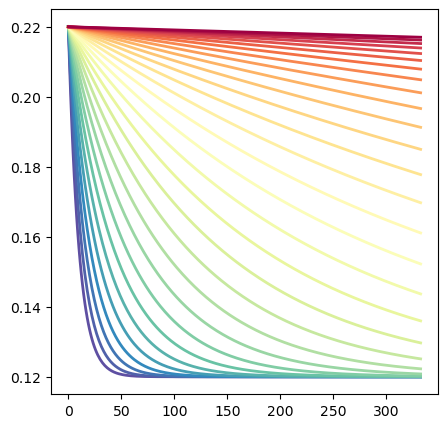

In [4]:
#Two parameters - one for scaling (s) + one for relaxing (r)
# Conversion from distance to edge weights, scaled (itself exponentially) by s
#s = 1.2, soften = 0.1, divisor = 10
#-------------------------------------------------------------------------------
def dist2edge(distance, divisor, soften, s, r):
    edgeweights = (s + np.exp(-soften/np.exp(r)*distance))/divisor
    return edgeweights


#S parameters
Nsteps  = 30
divisor = 10
soften = 0.1
r_vals   = np.array(np.linspace(0, 7, Nsteps)).tolist()
s = 1.2

#Plot each s value
fig, ax = plt.subplots(1, figsize=(5,5))
colors  = cm.Spectral_r(np.linspace(0,1,Nsteps))
distance = np.linspace(0, np.max(dist), 300)

for r in range(len(r_vals)):
    ax.plot(distance, dist2edge(distance, divisor, soften, s, r_vals[r]) ,  c=colors[r], linewidth = 2)
#ax.set_xscale('log')
#ax.set_yscale('log')
#plt.savefig('r_scaling.svg', transparent = True)

plt.show()

# Add dynamics
* network of LIF neurons

In [5]:
import brian2 as b2
from random import sample
from numpy import random

## LIF PARAMETERS
#Network dynamics
sim_time = 400
N = nodes.shape[0] 
v_rest= 0 #Resting potential
t_syn_del = 1 * b2.ms #delay between presynaptic spike and postsynaptic increase
tau_l = 20. * b2.ms #leak time constant - time taken for voltage to reach 63% of resting value
s = 1.2 #Synaptic weights

#External input
N_e = 1000 #number of presynaptic excitatory poisson neurons 
lam = 10 * b2.Hz #poisson rate of external population
w_e= 0.1  #synaptic weight of excitatory external possion neurons onto all neurons 

# Fit to baseline data
* k = 5 - 40 edges
* vth = 15 - 22
* r = 0 - 7
* cost function - bln/pre: cost_mean, p20: cost_max 

In [6]:
os.chdir(Fdrop + 'Project/' + experiment)
grid_list = sorted(glob.glob('*grid_search_av_nit9_*'))
grid_list[:12]

['grid_search_av_nit9_k-05_vth-15_r0-7.npy',
 'grid_search_av_nit9_k-05_vth-16_r0-7.npy',
 'grid_search_av_nit9_k-05_vth-17_r0-7.npy',
 'grid_search_av_nit9_k-05_vth-18_r0-7.npy',
 'grid_search_av_nit9_k-05_vth-19_r0-7.npy',
 'grid_search_av_nit9_k-05_vth-20_r0-7.npy',
 'grid_search_av_nit9_k-06_vth-15_r0-7.npy',
 'grid_search_av_nit9_k-06_vth-16_r0-7.npy',
 'grid_search_av_nit9_k-06_vth-17_r0-7.npy',
 'grid_search_av_nit9_k-06_vth-18_r0-7.npy',
 'grid_search_av_nit9_k-06_vth-19_r0-7.npy',
 'grid_search_av_nit9_k-06_vth-20_r0-7.npy']

In [7]:
#Combine into one giant list
av_list = list(range(len(grid_list)*8))
count = 0
for i in range(len(grid_list)):
    for e in range(8):
        k = grid_list[i][grid_list[i].find('k-')+2:grid_list[i].find('k-')+4]
        vth = grid_list[i][grid_list[i].find('vth-')+4:grid_list[i].find('vth-')+6]
        r = e
        av_list[count] = [[k, vth, r], np.load(grid_list[i], allow_pickle=True)[e]]
        count+=1

In [24]:
os.chdir(Fdrop + 'Project/' + experiment)
run1_str = sorted(glob.glob('*brute*optimise*bln.*'))[0]
run2_str  = sorted(glob.glob('*brute*optimise*pre.*'))[1]
run1_str, run2_str

('brute_optimise_max_bln.npy', 'brute_optimise_mean_pre.npy')

In [25]:
length = 1225
comb_run = list(range(length))
    
curr1 = np.load(run1_str, allow_pickle=True)
curr2 = np.load(run2_str, allow_pickle=True)
for i in range(length):
    entry_list = list(range(2))
    entry_list[0] = curr1[i][0]
    entry_list[1] = np.append(curr1[i][2][0], curr2[i][2][0])
    comb_run[i] = entry_list

In [48]:
k_vals = np.arange(5, 40, 4)
v_th_vals = np.arange(10,22, 2)
r_vals = np.arange(0,7, 1)

In [10]:
# COST LANDSCAPE - COARSE SWEEP
cost_max_vec = np.zeros((len(k_vals), len(v_th_vals), len(r_vals)))
cost_mean_vec = np.zeros((len(k_vals), len(v_th_vals), len(r_vals)))
for k_c, k in enumerate(k_vals):
    for v_th_c, v_th in enumerate(v_th_vals):
        for r_c, r in enumerate(r_vals):
            bind, spikes, volt = netfn.run_net(sim_time, k, v_th, r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
            av,pkg = crfn.avalanche_r(net_nnb, bind)
            cost_max, cost_mean = netfn.ks_log(av[0], bln_vec)
            cost_max_vec[k_c][v_th_c][r_c] = cost_max
            cost_mean_vec[k_c][v_th_c][r_c] = cost_mean
    print('Done k - ' + str(k))
np.save(Fdrop + 'Project/' + experiment + os.sep + 'paramsweepbln_cost_max', cost_max_vec)
np.save(Fdrop + 'Project/' + experiment + os.sep + 'paramsweepbln_cost_mean', cost_mean_vec)

Done k - 5
Done k - 9
Done k - 13
Done k - 17
Done k - 21
Done k - 25
Done k - 29
Done k - 33
Done k - 37


In [49]:
os.chdir(Fdrop + 'Project/' + experiment)
bln_sweep_max = sorted(glob.glob('*bln_cost_max*'))
bln_sweep_mean = sorted(glob.glob('*bln_cost_mean*'))
pre_sweep_max = sorted(glob.glob('*pre_cost_max*'))
pre_sweep_mean = sorted(glob.glob('*pre_cost_mean*'))

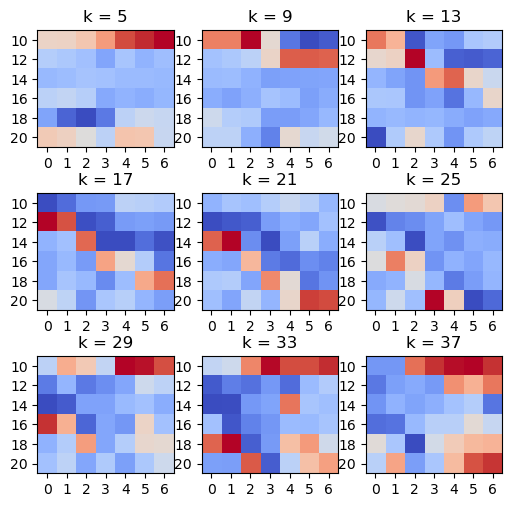

In [53]:
#NON-CONVEX FUNCTION - MULTIPLE LOCAL MINIMA
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
data_mat = np.load(bln_sweep_mean[0])
plt.figure(figsize=(6,6))
for i in range(len(k_vals)):
    curr = data_mat[i]
    plt.subplot(3,3,i+1)
    plot1 = plt.imshow(curr, cmap = 'coolwarm')
    plt.gca().set_title('k = ' + str(k_vals[i]))
    #plt.gca().set_xlabel('r', size = '15')
    #plt.gca().set_ylabel('v_th', size = '15')
    plt.gca().locator_params(axis='y', nbins=len(v_th_vals))
    plt.gca().locator_params(axis='x', nbins=len(r_vals))
    plt.gca().set_xticklabels(np.append(0,  r_vals) , fontsize = 10)
    plt.gca().set_yticklabels(np.append(0,v_th_vals), fontsize = 10)
plt.show()

### Fit to baseline

In [47]:
#BLN fit
empirical = bln_vec
mse_list_c = list(range(len(comb_run)))
for i in range(len(comb_run)):
    model = comb_run[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 0.4)
    mse_list_c[i] = MSE_B

In [48]:
bln_par = comb_run[np.where(mse_list_c == np.min(mse_list_c))[0][0]][0]
bln_fit = comb_run[np.where(mse_list_c == np.min(mse_list_c))[0][0]][1]
bln_mse =  np.min(mse_list_c)
bln_par, bln_mse

(array([ 7, 18,  0]), 0.4617013490299164)

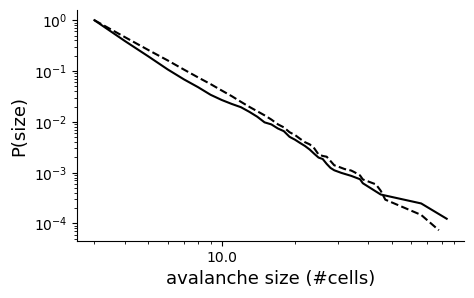

In [49]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = bln_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()



In [ ]:
def DCC(avdur, avsize):
    size = exp_s(avsize)[1]
    dur = exp_d(avdur)[1]
    pred_beta = (dur - 1)/(size - 1)
    
    
    
    return(Beta)

In [32]:
avsize = avsize_comb
avdur = avdur_comb

In [40]:
np.unique(avsize_comb)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
       16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
       29., 30., 31., 32., 33., 34., 35., 36., 38., 39., 40., 41., 44.,
       46., 48., 49., 50., 52., 54., 56., 57., 60., 62., 67., 69., 73.,
       86., 95.])

In [66]:
xaxis, yaxis

(array([1., 2.]), array([  4.46929082, 379.        ]))

In [67]:
avsize = avsize_comb
avdur = avdur_comb
sizevec, durvec = [],[]
for e in np.unique(avdur):
    sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
    durvec = np.append(durvec, e)

fig, axarr = plt.subplots(figsize = (7,5))
xaxis = np.unique(durvec)
yaxis = sizevec
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1)
m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1]), np.log10(yaxis[:len(xaxis)-1]), 1)
y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
bln_fit = m

plt.close


LinAlgError: SVD did not converge in Linear Least Squares

In [30]:
def exp_s(sizes):
    M=len(sizes)
    a=min(sizes) #define xmin
    b=max(sizes) #define xmax
    npart = 2000 #number of particles - number of draws from prior distribution
    ln=isfn.IS_LN(npart, sizes, M, a, b)
    po=isfn.IS(npart, sizes, M, a, b)
    LLR = po[1] - ln[2]
    exp = po[0]
    return(LLR, exp)
def exp_d(sizes):
    a=2 #define xmin
    b=max(sizes) #define xmax
    M=len(sizes[np.where(sizes>a-1)])
    npart = 2000 #number of particles - number of draws from prior distribution
    ln=isfn.IS_LN(npart, sizes, M, a, b)
    po=isfn.IS(npart, sizes, M, a, b)
    LLR = po[1] - ln[2]
    exp = po[0]
    return(LLR, exp)

In [8]:
#BLN fit
empirical = bln_vec
mse_list_c = list(range(len(av_list)))
for i in range(len(av_list)):
    model = av_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 0.4)
    mse_list_c[i] = MSE_B

In [9]:
bln_par = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][0]
bln_fit = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][1]
bln_mse =  np.min(mse_list_c)
bln_par, bln_mse

(['07', '20', 6], 0.42391138957613866)

In [62]:
np.unique(avdur_comb)

array([1., 2.])

In [46]:
bind, spikes, volt, spike_mon = netfn.run_net(sim_time, int(7), int(15), 6, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
av,pkg = crfn.avalanche_r(net_nnb, bind)\

In [58]:
avdur_comb, avsize_comb = [],[]
for i in range(9):
    bind, spikes, volt, spike_mon = netfn.run_net(sim_time, int(10), int(18), 0, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
    av,pkg = crfn.avalanche_r(net_nnb, bind)
    avsize_comb = np.append(avsize_comb, av[0])
    avdur_comb = np.append(avdur_comb, av[1])

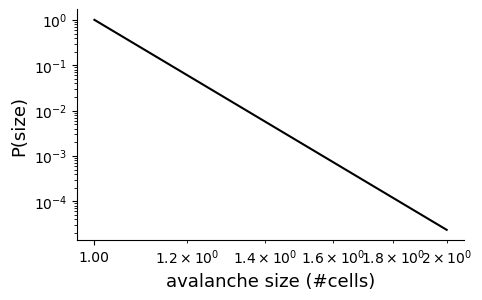

In [63]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = avdur_comb
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
#avdistcut = p20_vec
#powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

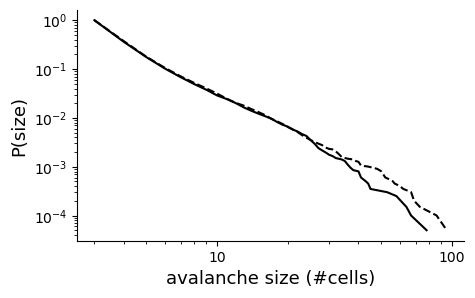

In [29]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = bln_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = avsize_comb
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

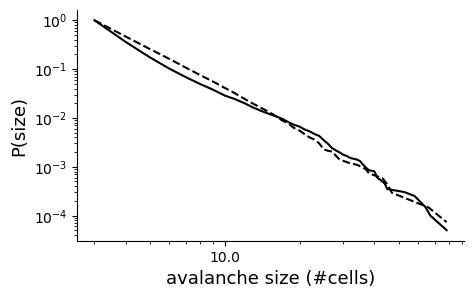

In [10]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = bln_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


### Fit to preseizure


In [50]:
#PRE fit
empirical = pre_vec
mse_list_c = list(range(len(comb_run)))
for i in range(len(comb_run)):
    model = comb_run[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 0.4)
    mse_list_c[i] = MSE_B

In [51]:
pre_par = comb_run[np.where(mse_list_c == np.min(mse_list_c))[0][0]][0]
pre_fit = comb_run[np.where(mse_list_c == np.min(mse_list_c))[0][0]][1]
pre_mse = np.min(mse_list_c)
pre_par, pre_mse

(array([ 7, 17,  2]), 0.468127881890048)

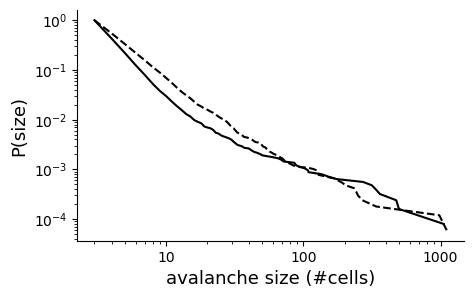

In [52]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [94]:
#PRE fit
empirical = pre_vec
mse_list_c = list(range(len(av_list)))
for i in range(len(av_list)):
    model = av_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 0.4)
    mse_list_c[i] = MSE_B

In [95]:
pre_par = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][0]
pre_fit = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][1]
pre_mse =  np.min(mse_list_c)
pre_par, pre_mse

(['05', '16', 2], 0.4899182468633584)

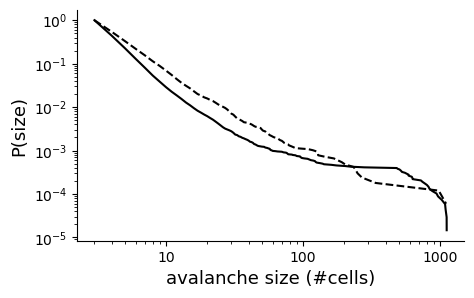

In [96]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [109]:
#K and Vth free
const_list = ['r']
val_list = [0]
data = av_list
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [110]:
empirical = pre_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 0.4)
    mse_list[i] = MSE_B
    
kvth_pre_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
kvth_pre_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
kvth_pre_mse = np.min(mse_list)
print(kvth_pre_par)
print('MSE = ' + str(np.min(kvth_pre_mse)))

['10', '18', 0]
MSE = 0.5097272432356182


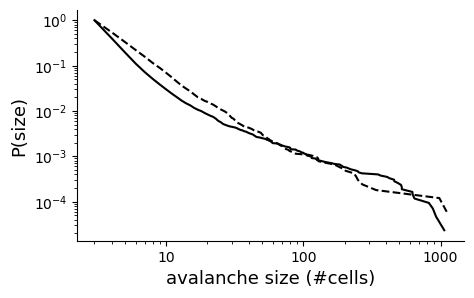

In [111]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = kvth_pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

### Fit to seizure


In [53]:
#SZ fit
empirical = p20_vec
mse_list_c = list(range(len(comb_run)))
for i in range(len(comb_run)):
    model = comb_run[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 0.4)
    mse_list_c[i] = MSE_B

In [54]:
sz_par = comb_run[np.where(mse_list_c == np.min(mse_list_c))[0][0]][0]
sz_fit = comb_run[np.where(mse_list_c == np.min(mse_list_c))[0][0]][1]
sz_mse = np.min(mse_list_c)
sz_par, sz_mse

(array([32, 19,  2]), 0.4285865119546829)

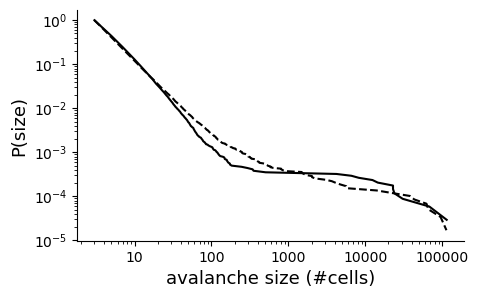

In [55]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [97]:
#SZ fit
empirical = p20_vec
mse_list_c = list(range(len(av_list)))
for i in range(len(av_list)):
    model = av_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 0.4)
    mse_list_c[i] = MSE_B

In [98]:
sz_par = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][0]
sz_fit = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][1]
sz_mse =  np.min(mse_list_c)
sz_par, sz_mse

(['31', '17', 1], 0.47769880775832685)

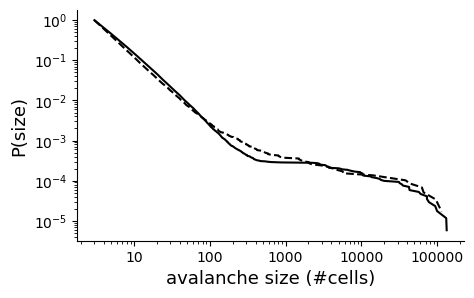

In [99]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [ ]:
avdur_comb, avsize_comb = [],[]
for i in range(9):
    bind, spikes, volt, spike_mon = netfn.run_net(sim_time, int(15), int(20), 6, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
    av,pkg = crfn.avalanche_r(net_nnb, bind)
    avsize_comb = np.append(avsize_comb, av[0])
    avdur_comb = np.append(avdur_comb, av[1])

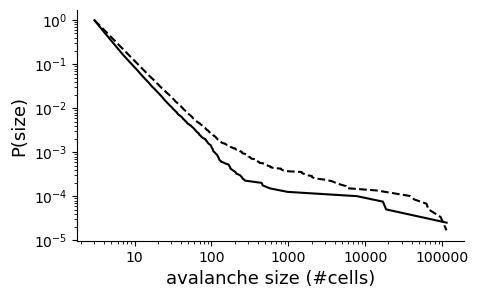

In [55]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = avsize_comb
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

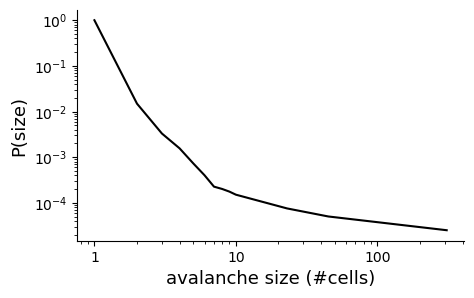

In [57]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = avdur_comb
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
#avdistcut = p20_vec
#powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

# Model comparison

In [71]:
pre_mse_list = [pre_mse, kvth_pre_mse, kr_pre_mse, vthr_pre_mse, k_pre_mse, vth_pre_mse, r_pre_mse]
pre_av_list = [pre_fit, kvth_pre_fit, kr_pre_fit, vthr_pre_fit, k_pre_fit, vth_pre_fit, r_pre_fit]
sz_mse_list = [sz_mse, kvth_sz_mse, kr_sz_mse, vthr_sz_mse, k_sz_mse, vth_sz_mse, r_sz_mse]
sz_av_list = [sz_fit, kvth_sz_fit, kr_sz_fit, vthr_sz_fit, k_sz_fit, vth_sz_fit, r_sz_fit]
name_list = ['all', 'k + vth', 'k + r','vth + r', 'k', 'vth', 'r']
par_list = [3, 2, 2, 2, 1, 1, 1]
n_obv = 100000

def AIC(mse, k, n):
    return(n*np.log(mse) + (2*k))

curr_av = pre_av_list
curr_mse = pre_mse_list
AIC_list = list(range(len(curr_av)))
for i in range(len(curr_av)):
    AIC_list[i] = AIC(curr_mse[i], par_list[i], n_obv)


pre_mse_df = {}
pre_mse_df = pd.DataFrame({"MSE":pre_mse_list , "Labels":  name_list})
pre_aic_df = {}
pre_aic_df = pd.DataFrame({"AIC":AIC_list , "Labels":  name_list})

In [78]:
pre_mse_df, pre_aic_df

(        MSE   Labels
 0  0.468128      all
 1  0.513181  k + vth
 2  0.498481    k + r
 3  0.468128  vth + r
 4  0.513181        k
 5  0.606235      vth
 6  0.548580        r,
             AIC   Labels
 0 -75895.376849      all
 1 -66708.714470  k + vth
 2 -69614.899099    k + r
 3 -75897.376849  vth + r
 4 -66710.714470        k
 5 -50046.765872      vth
 6 -60040.178505        r)

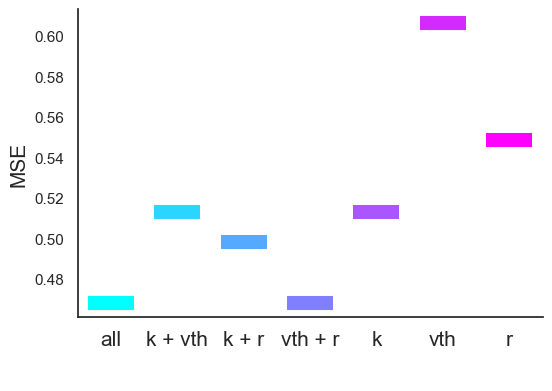

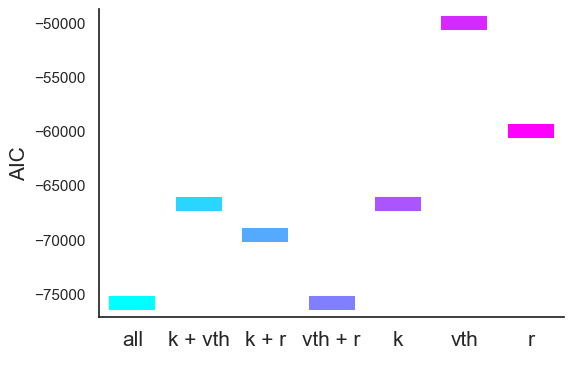

In [72]:
from matplotlib.collections import PathCollection
colors = cm.cool(np.linspace(0, 1, len(pre_mse_df)))
sns.set(style="white")
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="MSE", data = pre_mse_df, hue = 'Labels', palette = colors, join=True, ci=0, scale=5, markers = '_')

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '20')
ax.set_ylabel('MSE', size = '15')
ax.set_xticklabels(name_list, size = 15)
ax.legend_.remove()
plt.show()

fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="AIC", data = pre_aic_df, hue = 'Labels', palette = colors, join=True, ci=0, scale=5, markers = '_')

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '20')
ax.set_ylabel('AIC', size = '15')
ax.set_xticklabels(name_list, size = 15)
ax.legend_.remove()
#plt.savefig('av_MSE.svg', transparent = True)
plt.show()

In [73]:
curr_av = sz_av_list
curr_mse = sz_mse_list
AIC_list = list(range(len(curr_av)))
for i in range(len(curr_av)):
    AIC_list[i] = AIC(curr_mse[i], par_list[i], n_obv)


sz_mse_df = {}
sz_mse_df = pd.DataFrame({"MSE":sz_mse_list , "Labels":  name_list})
sz_aic_df = {}
sz_aic_df = pd.DataFrame({"AIC":AIC_list , "Labels":  name_list})

In [77]:
sz_mse_df, sz_aic_df

(        MSE   Labels
 0  0.428587      all
 1  0.428587  k + vth
 2  0.441417    k + r
 3  1.143525  vth + r
 4  0.519573        k
 5  1.314401      vth
 6  1.172509        r,
             AIC   Labels
 0 -84720.266645      all
 1 -84722.266645  k + vth
 2 -81772.552882    k + r
 3  13415.560386  vth + r
 4 -65472.841186        k
 5  27340.129427      vth
 6  15916.616677        r)

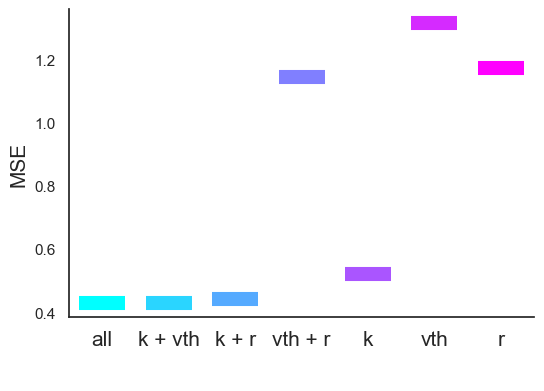

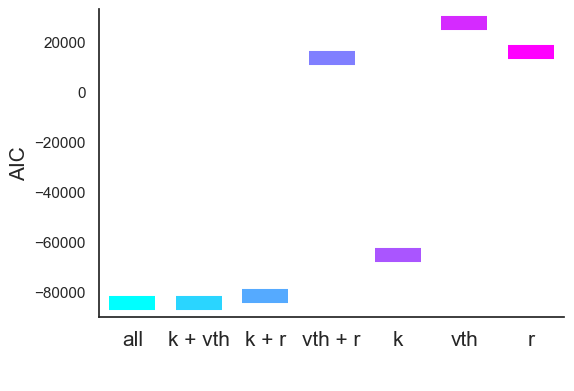

In [74]:
from matplotlib.collections import PathCollection
colors = cm.cool(np.linspace(0, 1, len(sz_mse_df)))
sns.set(style="white")
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="MSE", data = sz_mse_df, hue = 'Labels', palette = colors, join=True, ci=0, scale=5, markers = '_')

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '20')
ax.set_ylabel('MSE', size = '15')
ax.set_xticklabels(name_list, size = 15)
ax.legend_.remove()
plt.show()

fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="AIC", data = sz_aic_df, hue = 'Labels', palette = colors, join=True, ci=0, scale=5, markers = '_')

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '20')
ax.set_ylabel('AIC', size = '15')
ax.set_xticklabels(name_list, size = 15)
ax.legend_.remove()
#plt.savefig('av_MSE.svg', transparent = True)
plt.show()

## Baseline - preictal 

In [70]:
bln_k = 7
bln_vth = 20
bln_r = 6
bln_k, bln_vth, bln_r

(7, 20, 6)

### 2 parameters free

In [105]:
#K and Vth free
const_list = ['r']
val_list = [0]
data = av_list
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [106]:
empirical = pre_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 0.4)
    mse_list[i] = MSE_B
    
kvth_pre_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
kvth_pre_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
kvth_pre_mse = np.min(mse_list)
print(kvth_pre_par)
print('MSE = ' + str(np.min(kvth_pre_mse)))

['07', '19', 6]
MSE = 0.6284332098976941


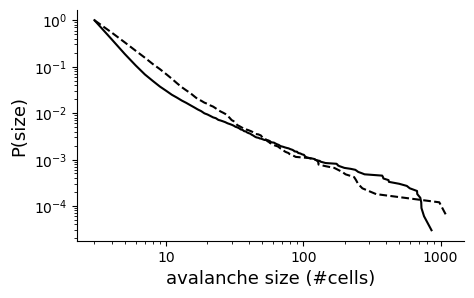

In [107]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = kvth_pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [105]:
#K and r free
const_list = ['v_th']
val_list = [18]
data = comb_run
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [106]:
empirical = pre_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 0.4)
    mse_list[i] = MSE_B
    
kr_pre_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
kr_pre_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
kr_pre_mse = np.min(mse_list)
print(kr_pre_par)
print('MSE = ' + str(np.min(kr_pre_mse)))

[ 8 18  2]
MSE = 0.4984814055918295


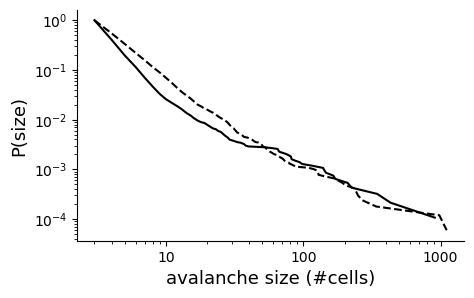

In [107]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = kr_pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [108]:
#vth r free
const_list = ['k']
val_list = [7]
data = comb_run
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [109]:
empirical = pre_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 0.4)
    mse_list[i] = MSE_B
    
vthr_pre_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
vthr_pre_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
vthr_pre_mse = np.min(mse_list)
print(vthr_pre_par)
print('MSE = ' + str(np.min(vthr_pre_mse)))

[ 7 17  2]
MSE = 0.468127881890048


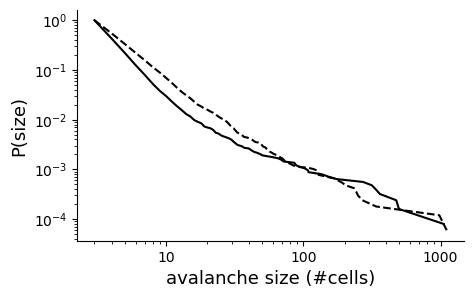

In [110]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = vthr_pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

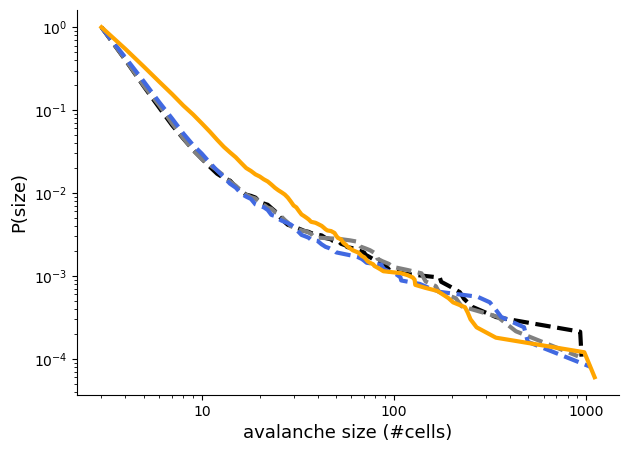

In [111]:
fig, axarr = plt.subplots(figsize = (7,5))
colors = ['orange', 'orangered']
sns.reset_orig()

av = kvth_pre_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =3 , markersize = 1, alpha = 1, c = 'black') 
av = kr_pre_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =3 , markersize = 1, alpha = 1, c = 'grey') 
av = vthr_pre_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =3 , markersize = 1, alpha = 1, c = 'royalblue') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 1, alpha = 1, c = 'orange')

axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig('av_prefit_2.svg', transparent = True)
plt.show()

### 1 parameter free

In [112]:
bln_k = 7
bln_vth = 18
bln_r = 0
bln_k, bln_vth, bln_r

(7, 18, 0)

In [113]:
#k free
const_list = ['v_th', 'r']
val_list = [bln_vth, bln_r]
data = comb_run
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [114]:
empirical = pre_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 0.4)
    mse_list[i] = MSE_B
    
k_pre_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
k_pre_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
k_pre_mse = np.min(mse_list)
print(k_pre_par)
print('MSE = ' + str(np.min(k_pre_mse)))

[10 18  0]
MSE = 0.5131807561516823


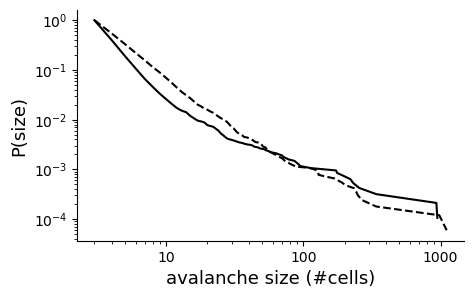

In [115]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = k_pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [116]:
#vth free
const_list = ['k', 'r']
val_list = [bln_k, bln_r]
data = comb_run
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [117]:
empirical = pre_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 0.4)
    mse_list[i] = MSE_B
    
vth_pre_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
vth_pre_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
vth_pre_mse = np.min(mse_list)
print(vth_pre_par)
print('MSE = ' + str(np.min(vth_pre_mse)))

[ 7 16  0]
MSE = 0.6062349518567162


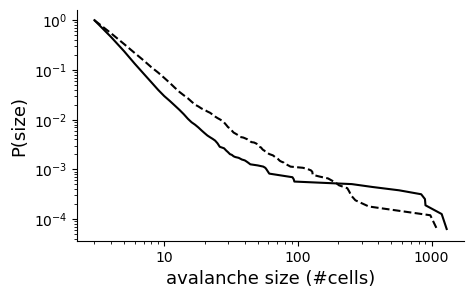

In [118]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = vth_pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [119]:
#r free
const_list = ['k', 'v_th']
val_list = [bln_k, bln_vth]
data = comb_run
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [120]:
empirical = pre_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 0.4)
    mse_list[i] = MSE_B
    
r_pre_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
r_pre_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
r_pre_mse = np.min(mse_list)
print(r_pre_par)
print('MSE = ' + str(np.min(r_pre_mse)))

[ 7 18  3]
MSE = 0.548580204359518


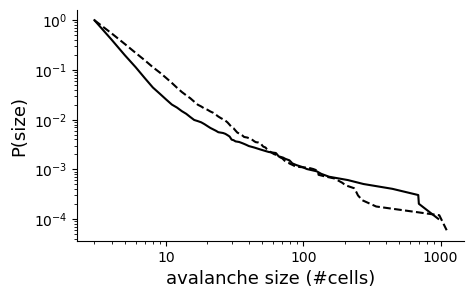

In [121]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = r_pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

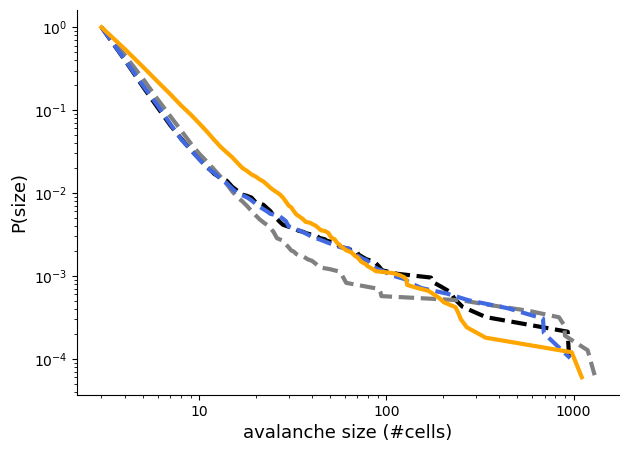

In [122]:
fig, axarr = plt.subplots(figsize = (7,5))
colors = ['orange', 'orangered']
sns.reset_orig()

av = k_pre_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =3 , markersize = 1, alpha = 1, c = 'black') 
av = vth_pre_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =3 , markersize = 1, alpha = 1, c = 'grey') 
av = r_pre_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =3 , markersize = 1, alpha = 1, c = 'royalblue') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 1, alpha = 1, c = 'orange')

axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig('av_prefit_1.svg', transparent = True)
plt.show()

## Preictal - ictal 

In [71]:
pre_k = 7
pre_vth = 17
pre_r = 2
pre_k, pre_vth, pre_r

(7, 17, 2)

### 2 parameters free

In [72]:
#K and Vth free
const_list = ['r']
val_list = [pre_r]
data = comb_run
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [73]:
empirical = p20_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 0.4)
    mse_list[i] = MSE_B
    
kvth_sz_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
kvth_sz_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
kvth_sz_mse = np.min(mse_list)
print(kvth_sz_par)
print('MSE = ' + str(np.min(kvth_sz_mse)))

[32 19  2]
MSE = 0.4285865119546829


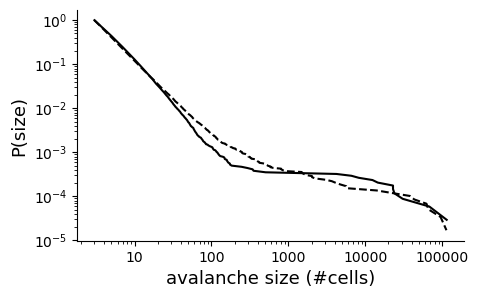

In [74]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = kvth_sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [75]:
#K and r free
const_list = ['v_th']
val_list = [pre_vth]
data = comb_run
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [76]:
empirical = p20_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 0.4)
    mse_list[i] = MSE_B
    
kr_sz_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
kr_sz_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
kr_sz_mse = np.min(mse_list)
print(kr_sz_par)
print('MSE = ' + str(np.min(kr_sz_mse)))

[18 17  5]
MSE = 0.44141688667304624


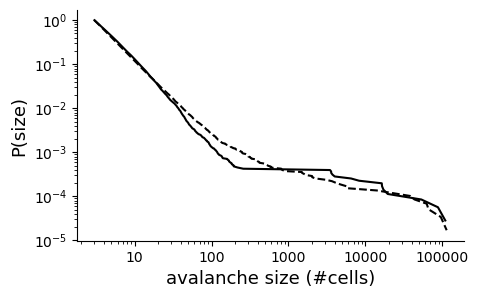

In [77]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = kr_sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [78]:
#vth and r free
const_list = ['k']
val_list = [pre_k]
data = comb_run
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [79]:
empirical = p20_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 0.4)
    mse_list[i] = MSE_B
    
vthr_sz_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
vthr_sz_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
vthr_sz_mse = np.min(mse_list)
print(vthr_sz_par)
print('MSE = ' + str(np.min(vthr_sz_mse)))

[ 7 18  5]
MSE = 1.1435250079104748


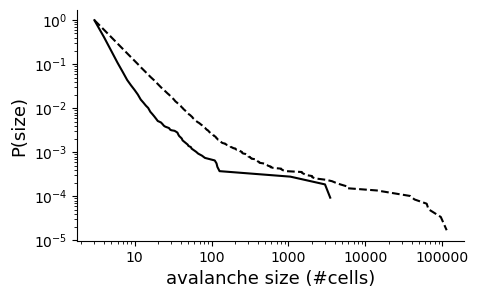

In [80]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = vthr_sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

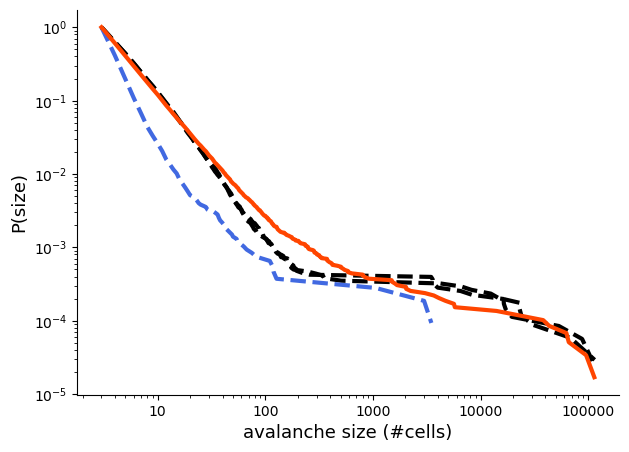

In [99]:
fig, axarr = plt.subplots(figsize = (7,5))
colors = ['orange', 'orangered']
sns.reset_orig()

av = kvth_sz_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =3 , markersize = 1, alpha = 1, c = 'black') 
av = kr_sz_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =3 , markersize = 1, alpha = 1, c = 'black') 
av = vthr_sz_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =3 , markersize = 1, alpha = 1, c = 'royalblue') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 1, alpha = 1, c = 'orangered')

axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig('av_kfit_2.svg', transparent = True)
plt.show()

### 1 parameter free

In [81]:
#k free
const_list = ['r', 'v_th']
val_list = [pre_r, pre_vth]
data = comb_run
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [82]:
empirical = p20_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 0.4)
    mse_list[i] = MSE_B
    
k_sz_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
k_sz_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
k_sz_mse = np.min(mse_list)
print(k_sz_par)
print('MSE = ' + str(np.min(k_sz_mse)))

[26 17  2]
MSE = 0.51957276449221


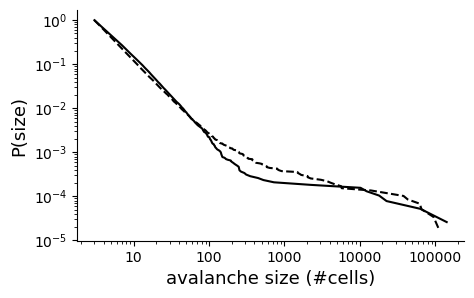

In [83]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = k_sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [84]:
#vth free
const_list = ['r', 'k']
val_list = [pre_r, pre_k]
data = comb_run
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [85]:
empirical = p20_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 0.4)
    mse_list[i] = MSE_B
    
vth_sz_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
vth_sz_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
vth_sz_mse = np.min(mse_list)
print(vth_sz_par)
print('MSE = ' + str(np.min(vth_sz_mse)))

[ 7 16  2]
MSE = 1.314401322977949


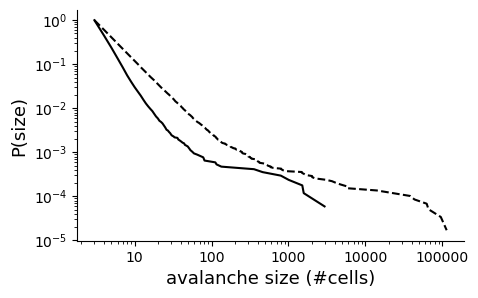

In [86]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = vth_sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [87]:
#r free
const_list = ['v_th','k']
val_list = [pre_vth, pre_k]
data = comb_run
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [88]:
empirical = p20_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 0.4)
    mse_list[i] = MSE_B
    
r_sz_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
r_sz_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
r_sz_mse = np.min(mse_list)
print(r_sz_par)
print('MSE = ' + str(np.min(r_sz_mse)))

[ 7 17  6]
MSE = 1.172509316055012


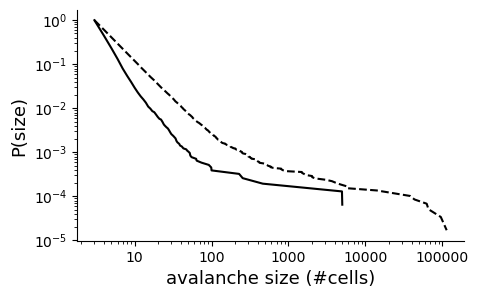

In [90]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = r_sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

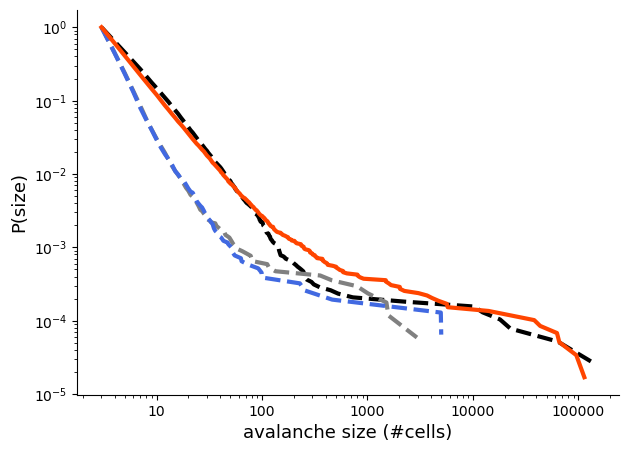

In [100]:
fig, axarr = plt.subplots(figsize = (7,5))
colors = ['orange', 'orangered']
sns.reset_orig()

av = k_sz_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =3 , markersize = 1, alpha = 1, c = 'black') 
av = vth_sz_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =3 , markersize = 1, alpha = 1, c = 'grey') 
av = r_sz_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =3 , markersize = 1, alpha = 1, c = 'royalblue') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 1, alpha = 1, c = 'orangered')

axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig('av_kfit_1.svg', transparent = True)
plt.show()